In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2 as cv

## Constants

In [2]:
DATASET_DIR = "./dataset"
TRAIN_DIR = f"{DATASET_DIR}/train"
TEST_DIR = f"{DATASET_DIR}/test"

## Load metadata

In [4]:
tile_meta = pd.read_csv("./dataset/tile_meta.csv")
tile_meta.head()

id  source_wsi  dataset      i      j
0  0006ff2aa7cd           2        2  16896  16420
1  000e79e206b7           6        3  10240  29184
2  00168d1b7522           2        2  14848  14884
3  00176a88fdb0           7        3  14848  25088
4  0033bbc76b6b           1        1  10240  43008

In [5]:
wsi_meta = pd.read_csv("./dataset/wsi_meta.csv")
wsi_meta.head()

source_wsi  age sex race  height  weight   bmi
0           1   58   F    W   160.0    59.0  23.0
1           2   56   F    W   175.2   139.6  45.5
2           3   73   F    W   162.3    87.5  33.2
3           4   53   M    B   166.0    73.0  26.5

In [6]:
with open("./dataset/polygons.jsonl") as polygons:
    lines = polygons.read().splitlines()

lines = [json.loads(line) for line in lines]
polygons_meta = pd.DataFrame(lines)
polygons_meta.head()

id                                        annotations
0  0006ff2aa7cd  [{'type': 'glomerulus', 'coordinates': [[[167,...
1  00168d1b7522  [{'type': 'glomerulus', 'coordinates': [[[511,...
2  0033bbc76b6b  [{'type': 'blood_vessel', 'coordinates': [[[16...
3  003504460b3a  [{'type': 'blood_vessel', 'coordinates': [[[40...
4  004daf1cbe75  [{'type': 'blood_vessel', 'coordinates': [[[14...

## Show example

(512, 512, 3)

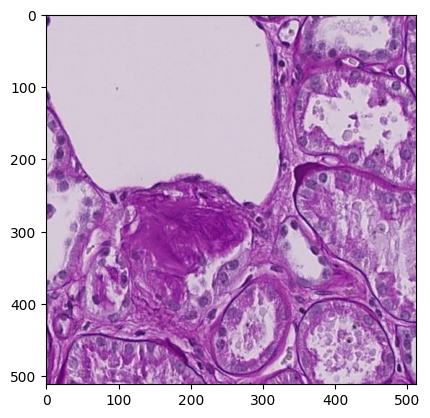

In [22]:
sample = polygons_meta.sample()

id = sample.id.values[0]

original_img = plt.imread(f"{TRAIN_DIR}/{id}.tif")
plt.imshow(original_img)
original_img.shape

In [23]:
def show_sample(sample):
    id = sample.id

    original_img = plt.imread(f"{TRAIN_DIR}/{id}.tif")
    plt.imshow(original_img)
    plt.show()

    mask_blank = np.zeros(shape=(original_img.shape[0], original_img.shape[1]))
    masks = sample.annotations
    print(len(masks))
    
    for mask in masks:
        mask = mask["coordinates"]
        points = np.array(mask)
        mask = cv.fillConvexPoly(mask_blank, points, 1)

        plt.imshow(mask)
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.imshow(original_img)
    plt.imshow(mask, alpha=0.3)
    plt.show()

14


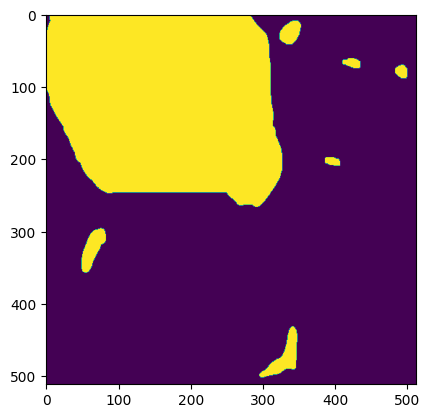

In [24]:
mask_blank = np.zeros(shape=(original_img.shape[0], original_img.shape[1]))
masks = sample.annotations.values[0]
print(len(masks))

for mask in masks:
    mask = mask["coordinates"]
    points = np.array(mask)
    mask = cv.fillConvexPoly(mask_blank, points, 1)

    plt.imshow(mask)
    

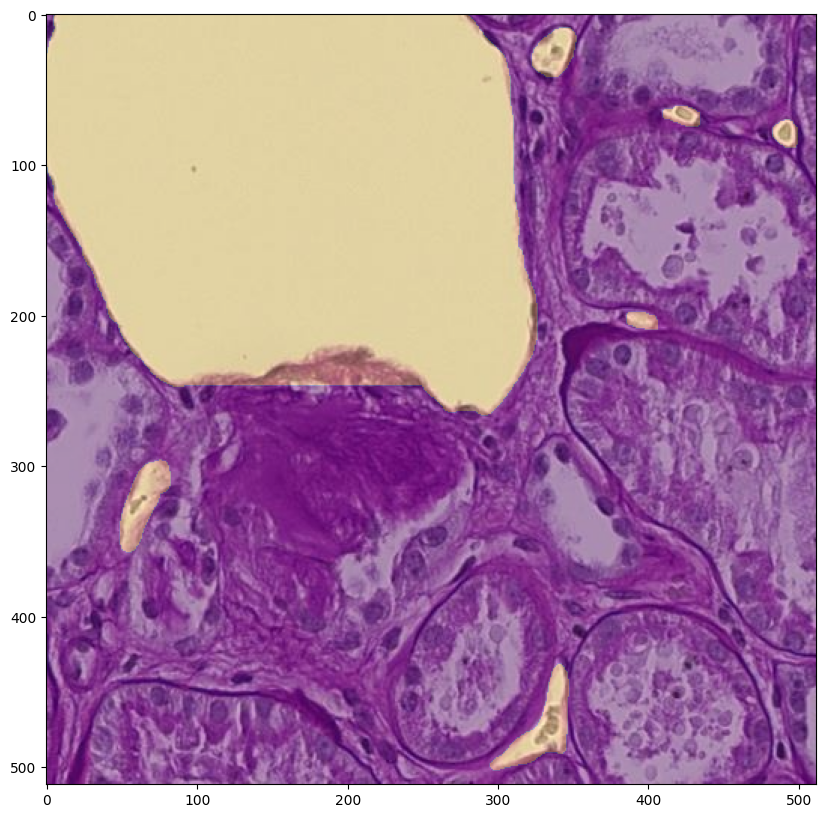

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(original_img)
plt.imshow(mask, alpha=0.3)

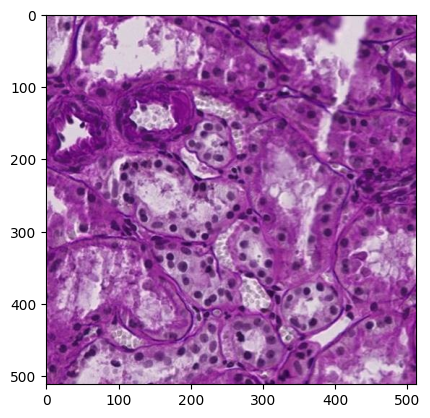

15


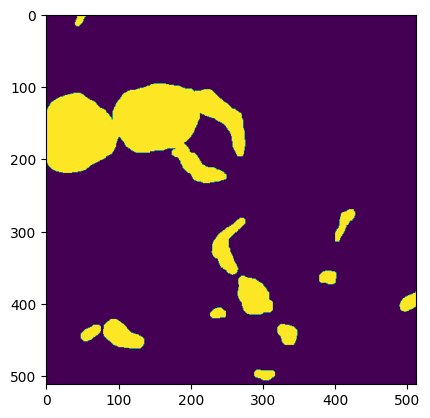

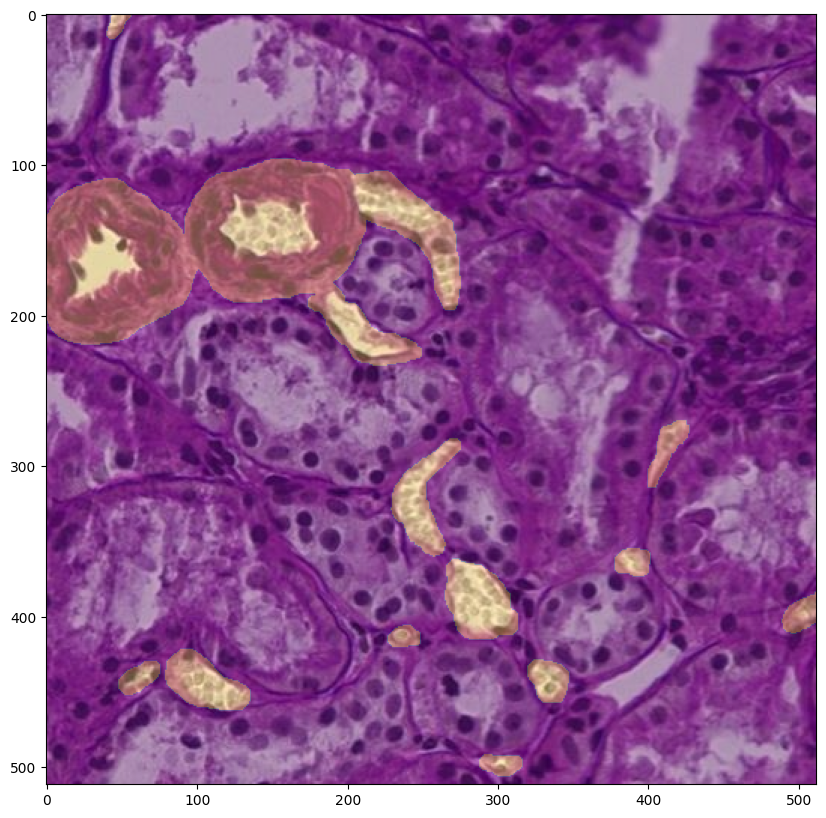

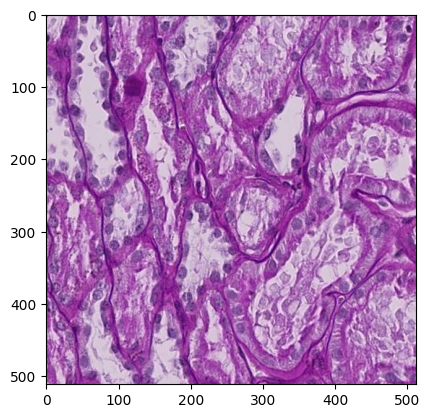

16


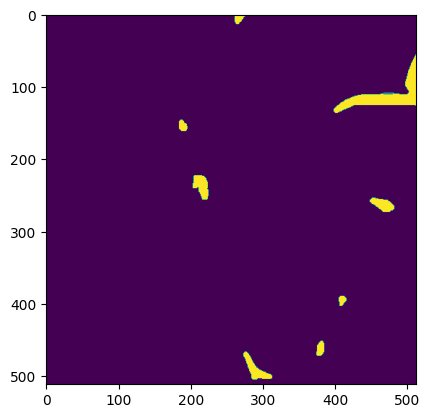

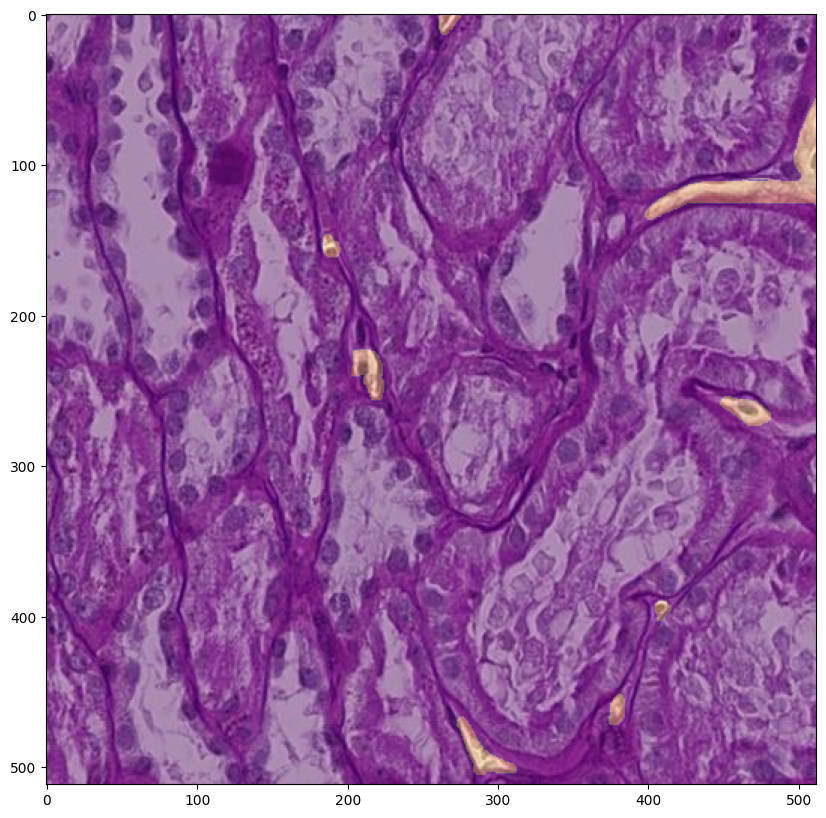

In [27]:
samples = polygons_meta.sample(n=2)

for i, sample in samples.iterrows():
    show_sample(sample)